In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습]
* 기상 데이터 분석
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [37]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 13 88955   13 12402    0     0  20988      0  0:00:04 --:--:--  0:00:04 21056
100 88955  100 88955    0     0   110k      0 --:--:-- --:--:-- --:--:--  110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: weather.csv


In [38]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0)
weather.head()
weather.index
weather.info()  #결측치 확인


<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 2010-08-01 to 2020-07-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   평균 기온   3653 non-null   float64
 1   최대 풍속   3649 non-null   float64
 2   평균 풍속   3647 non-null   float64
dtypes: float64(3)
memory usage: 114.2+ KB


In [39]:
# Note:
# weather_1 = pd.read_csv("weather.csv", index_col=0, parse_date=True) #csv ->df
# weather_1.index #datetimeIndex
# weather_1.head()
# weather_1['year'] = weather_1.index.year
# weather_1['mon'] = weather_1.index.month

In [40]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())

# 2) 결측치 탐지 및 처리
missing_data1 = weather[weather['평균 풍속'].isna()] #누락된 값 확인
print(missing_data1)
missing_data2 = weather[weather['최대 풍속'].isna()] #누락된 값 확인
print(missing_data2)

#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean()
mean_wind
weather['평균 풍속'].fillna(mean_wind, inplace=True)
print(weather.loc["2012-02-11"])

평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN
            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2019-04-19    7.8    NaN    2.3
평균 기온   -0.700000
최대 풍속         NaN
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_1720\2760303876.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['평균 풍속'].fillna(mean_wind, inplace=True)


In [41]:
# 4) 결측 값을 최대 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['최대 풍속'].mean()
mean_wind
weather['최대 풍속'].fillna(mean_wind, inplace=True)
print(weather.loc["2012-02-11"])

평균 기온   -0.700000
최대 풍속    7.911099
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_1720\888801968.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['최대 풍속'].fillna(mean_wind, inplace=True)


In [42]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기


In [43]:
# 3.1 데이터프레임 평탄화
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [44]:
weather.reset_index(inplace=True)
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


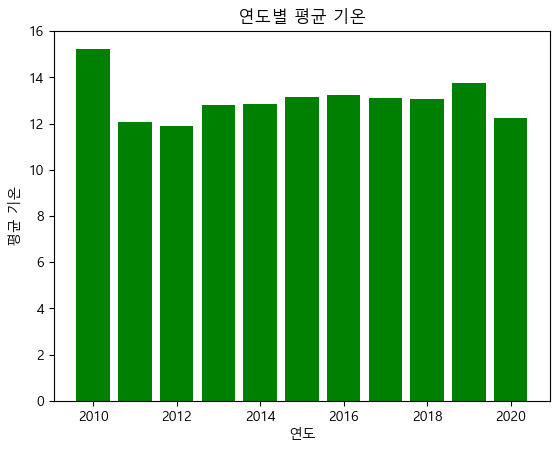

In [45]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year

# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()

# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")  #plt.bar(x축 데이터, y축 데이터, ..)
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [46]:
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속,year
0,2010-08-01,28.7,8.3,3.4,2010
1,2010-08-02,25.2,8.7,3.8,2010
2,2010-08-03,22.1,6.3,2.9,2010
3,2010-08-04,25.3,6.6,4.2,2010
4,2010-08-05,27.2,9.1,5.6,2010


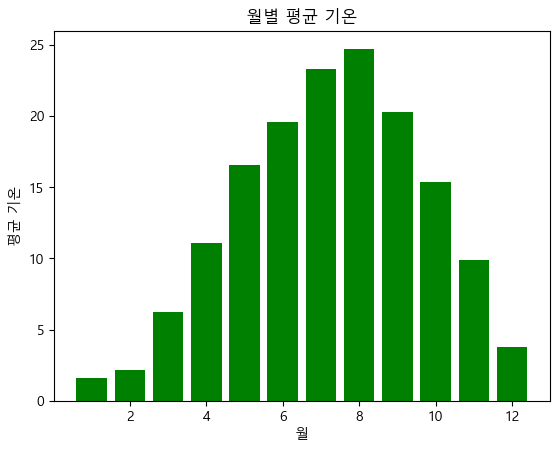

In [47]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()

Text(0, 0.5, '평균 풍속')

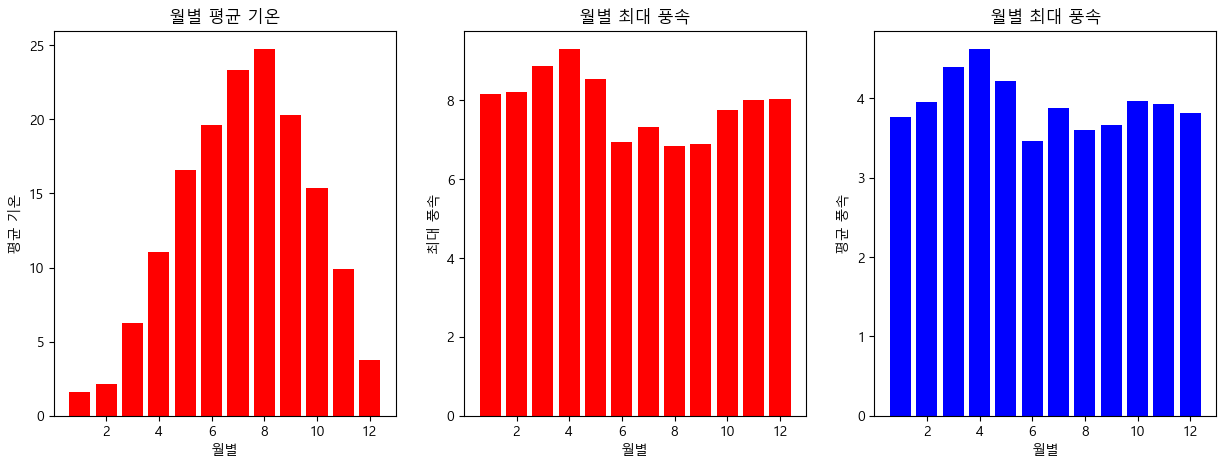

In [48]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

Text(0, 0.5, '평균 풍속')

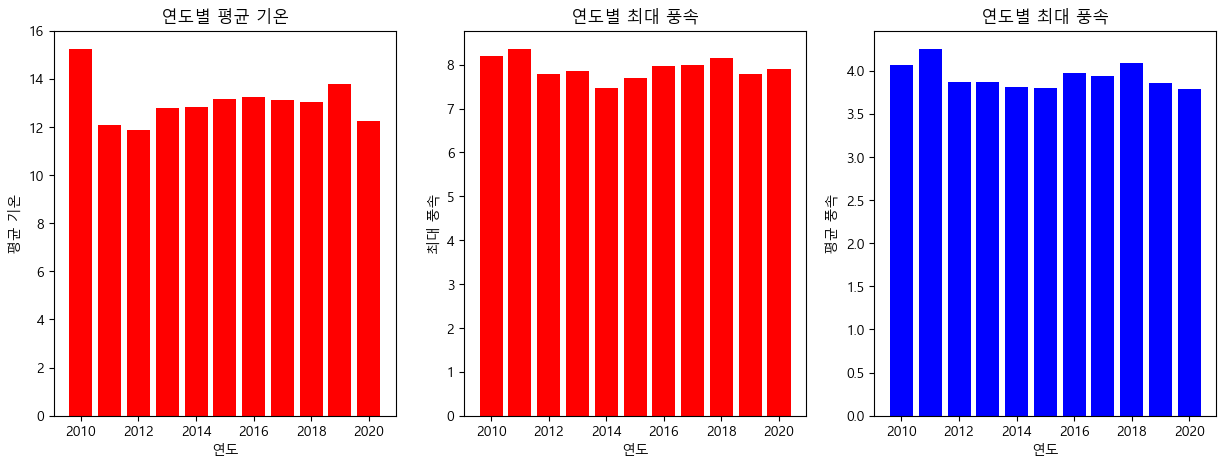

In [49]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [50]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [51]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
#monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.222026,3.946676
3,6.250323,8.871935,4.388827
4,11.064667,9.300370,4.617910
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

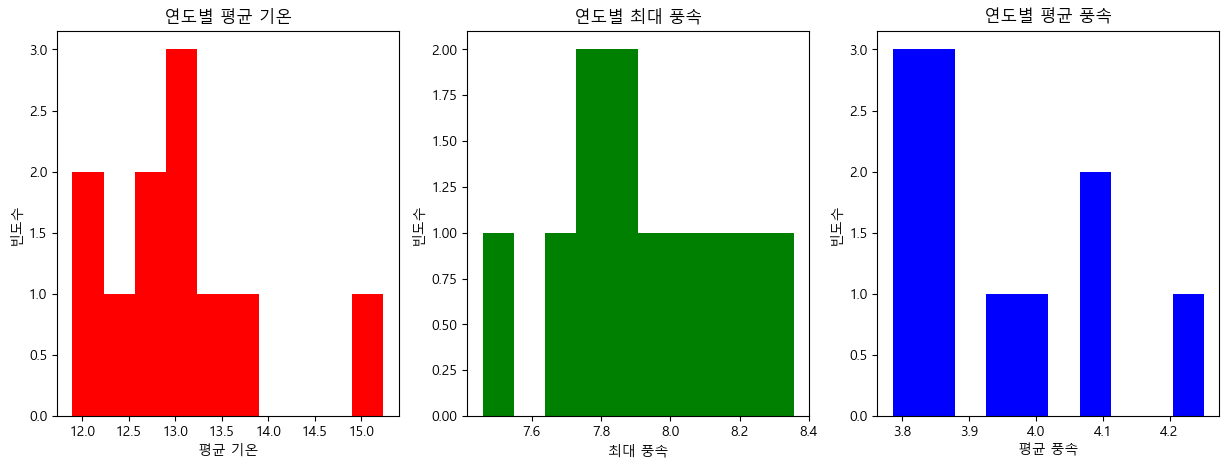

In [52]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스트그램으로 출력하시오.

# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


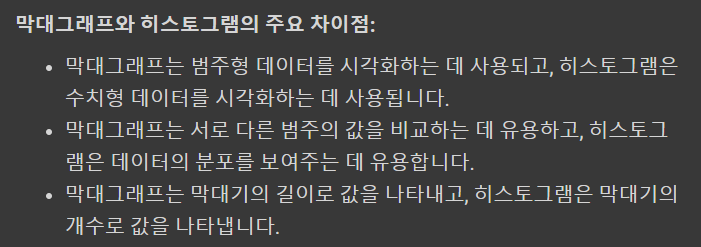

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [5]:
weather = pd.read_csv("weather.csv", parse_dates= True, index_col = 0)
print(weather.head(3))
print(weather.tail(3))

            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [6]:
weather.loc["2015-06-06"]

평균 기온    16.6
최대 풍속     4.4
평균 풍속     1.9
Name: 2015-06-06 00:00:00, dtype: float64

## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [7]:
# ex1
date = weather[weather["평균 기온"] == weather["평균 기온"].max()]
date

,평균 기온,최대 풍속,평균 풍속
일시,,,
2013-08-08,31.3,7.8,4.6


In [8]:
# ex2
maxdateIndex=weather["평균 기온"].idxmax()
weather.loc[maxdateIndex]

평균 기온    31.3
최대 풍속     7.8
평균 풍속     4.6
Name: 2013-08-08 00:00:00, dtype: float64

## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [9]:
# ex1
weather[weather["평균 기온"] >= 30]

,평균 기온,최대 풍속,평균 풍속
일시,,,
2013-08-08,31.3,7.8,4.6
2013-08-09,30.6,9.9,6.4
2013-08-10,30.6,7.4,3.8
2018-07-23,30.5,6.5,1.6
2018-08-04,30.3,5.8,3.0


In [10]:
# ex2
date = weather[weather["평균 기온"] >= 30]
date

,평균 기온,최대 풍속,평균 풍속
일시,,,
2013-08-08,31.3,7.8,4.6
2013-08-09,30.6,9.9,6.4
2013-08-10,30.6,7.4,3.8
2018-07-23,30.5,6.5,1.6
2018-08-04,30.3,5.8,3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

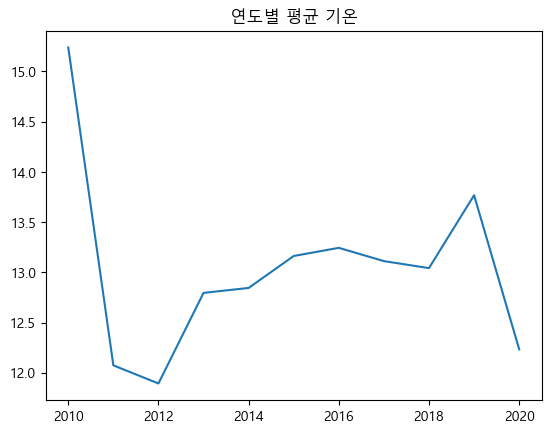

In [11]:

weather.reset_index(inplace=True)

weather['year'] = pd.DatetimeIndex(weather['일시']).year

plt.plot(weather.groupby('year')['평균 기온'].mean())
plt.title('연도별 평균 기온')
plt.show()


## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

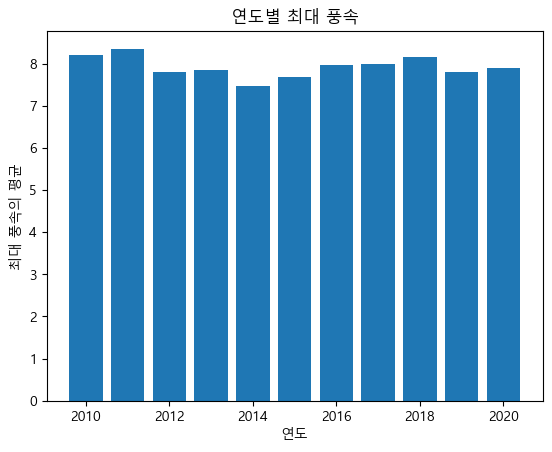

In [12]:

weather.reset_index(inplace=True)  #인덱스 재설정
weather['year'] = pd.DatetimeIndex(weather['일시']).year 
yearly_temp = weather.groupby('year')['최대 풍속'].mean()
years = np.arange(2010,2021)
plt.bar(years, yearly_temp)
plt.xlabel('연도')
plt.ylabel('최대 풍속의 평균')
plt.title("연도별 최대 풍속")
plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


       평균 풍속
year        
2010   622.6
2011  1551.7
2012  1402.6
2013  1414.3
2014  1393.0
2015  1379.2
2016  1455.9
2017  1436.2
2018  1491.2
2019  1403.0
2020   806.5


Text(0, 0.5, '평균 풍속의 합')

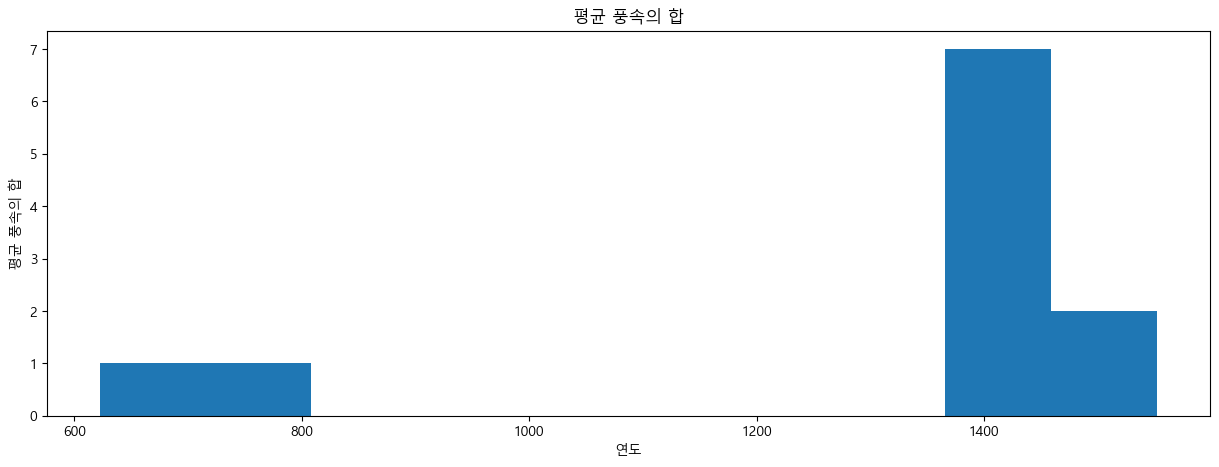

In [13]:
yearly_sum = weather.groupby('year')[['평균 풍속']].sum()
print(yearly_sum)

fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.hist(yearly_sum, bins=10)
axs.set_title("평균 풍속의 합")
axs.set_xlabel("연도")
axs.set_ylabel("평균 풍속의 합")


## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [53]:
# ex1
if yearly_means.loc[2015]['평균 기온'] > yearly_means.loc[2016]['평균 기온']:
    print("2015년이 더 더웠습니다")
else:
    print("2016년이 더 더웠습니다")

2016년이 더 더웠습니다


In [54]:
# ex2
Mean15 = yearly_means.loc[2015]['평균 기온']
Mean16 = yearly_means.loc[2016]['평균 기온']

if Mean15 > Mean16:
    print("2015년도가 더 더웠습니다")
else:
    print("2016년도가 더 더웠습니다")

print()
print("2015년 평균 기온 : ", Mean15)

print()
print("2016년 평균 기온 : ", Mean16)


2016년도가 더 더웠습니다

2015년 평균 기온 :  13.162465753424659

2016년 평균 기온 :  13.243442622950822


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [55]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month
monthly_sum = weather.groupby('month')['평균 기온'].sum()
print(monthly_sum)
Min = monthly_sum.idxmin()
Max = monthly_sum.idxmax()
print("평균기온의 합이 가장 적은 달 : ", Min,"월")
print("평균기온의 합이 가장 적은 달 : ", Max,"월")

month
1      495.5
2      604.6
3     1937.6
4     3319.4
5     5134.9
6     5885.0
7     7231.8
8     7672.1
9     6097.1
10    4769.0
11    2966.9
12    1163.6
Name: 평균 기온, dtype: float64
평균기온의 합이 가장 적은 달 :  1 월
평균기온의 합이 가장 적은 달 :  8 월


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [56]:
weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearly_mean = weather.groupby('year')['최대 풍속'].mean()
print(yearly_mean)

Max_year = yearly_mean.idxmax()
print("연도별 최대 풍속이 가장 큰 연도 : ", Max_year, "년")


year
2010    8.205229
2011    8.355616
2012    7.795446
2013    7.859726
2014    7.458904
2015    7.694247
2016    7.963934
2017    8.001370
2018    8.158630
2019    7.797017
2020    7.897183
Name: 최대 풍속, dtype: float64
연도별 최대 풍속이 가장 큰 연도 :  2011 년
